# Домашнее задание №2 «Проектное задание»
*Выполнили: Гойал Аниш, Бегзадян Максим Александрович*


>Github link https://github.com/DasAneesh/DZ_2

## 1. Название задания

#Цитируемость

## 2. Алгоритм

### 2.1 Псевдокод алгоритма

>Подзадача 1

```
01  ФУНКЦИЯ analyze_citation_graph() → НИЧЕГО:
02      // Шаг 1: Загрузка данных
03      uploaded ← ЗАПРОСИТЬ_ФАЙЛ_У_ПОЛЬЗОВАТЕЛЯ()
04      ЕСЛИ uploaded ПУСТО:
05          ВЫБРОСИТЬ_ОШИБКУ("Файл не загружен! Следуйте инструкциям...")
06      
07      file_name ← ПЕРВЫЙ_КЛЮЧ(uploaded)
08      
09      // Шаг 2: Построение графа цитирования
10      graph ← НОВЫЙ СЛОВАРЬ(список)  // {cited: [citing]}
11      
12      ОТКРЫТЬ file_name КАК f:
13          ДЛЯ КАЖДОЙ line В f:
14              decoded_line ← РАСШИФРОВАТЬ(line)
15              ЕСЛИ decoded_line ПУСТО:
16                  ПРОПУСТИТЬ
17              papers ← РАЗДЕЛИТЬ_СТРОКУ(decoded_line)
18              citing_paper ← papers[0]
19              ДЛЯ КАЖДОГО cited_paper В papers[1:]:
20                  ДОБАВИТЬ(graph[cited_paper], citing_paper)
21      
22      // Шаг 3: Подсчёт входящих степеней
23      all_papers ← ОБЪЕДИНИТЬ_МНОЖЕСТВА(КЛЮЧИ(graph), ВСЕ_ЭЛЕМЕНТЫ(graph.ЗНАЧЕНИЯ()))
24      in_degrees ← НОВЫЙ СЛОВАРЬ(0)  // {paper: степень}
25      
26      ДЛЯ КАЖДОЙ (cited, citers) В graph:
27          in_degrees[cited] ← ДЛИНА(citers)
28      
29      // Шаг 4: Построение распределения степеней
30      degree_distribution ← НОВЫЙ СЛОВАРЬ(0)  // {degree: count}
31      
32      ДЛЯ КАЖДОГО deg В in_degrees.ЗНАЧЕНИЯ():
33          degree_distribution[deg] ← degree_distribution[deg] + 1
34      
35      // Шаг 5: Нормализация распределения
36      total ← СУММА(degree_distribution.ЗНАЧЕНИЯ())
37      norm_distribution ← НОВЫЙ СЛОВАРЬ()
38      
39      ДЛЯ КАЖДОЙ (k, v) В degree_distribution:
40          norm_distribution[k] ← v / total
41      
42      // Шаг 6: Построение лог-лог графика
43      x ← КЛЮЧИ(norm_distribution)
44      y ← ЗНАЧЕНИЯ(norm_distribution)
45      
46      СОЗДАТЬ_ГРАФИК(РАЗМЕР=(8,6))
47      НАРИСОВАТЬ_ТОЧКИ(log10(x), log10(y), ЦВЕТ='синий', РАЗМЕР=4)
48      ПОДПИСАТЬ_ОСИ("log(входящая степень)", "log(доля статей)")
49      УСТАНОВИТЬ_ЗАГОЛОВОК("Лог-лог график распределения входящих степеней")
50      ВКЛЮЧИТЬ_СЕТКУ(ИСТИНА)
51      ПОКАЗАТЬ_ГРАФИК()
52      
53      ВЫВЕСТИ("Основание логарифма: 10")
54  КОНЕЦ ФУНКЦИИ
```

>Подзадача 2

```
01  ФУНКЦИЯ compare_with_er_graph(in_degrees, graph) → НИЧЕГО:
02      // Шаг 1: Инициализация параметров
03      num_nodes ← ДЛИНА(in_degrees)                
04      num_edges_real ← СУММА(ДЛИНА(citers) ДЛЯ ВСЕХ citers В graph.ЗНАЧЕНИЯ())  
05      N ← 10                                      // Количество случайных графов
06      
07      // Шаг 2: Многократная генерация ER-графов
08      degree_counts ← НОВЫЙ СЛОВАРЬ(0.0)          
09      
10      ДЛЯ _ ОТ 1 ДО N ВЫПОЛНЯТЬ:
11          in_deg ← НОВЫЙ СЛОВАРЬ(0)             
12          
13          // Генерация num_edges_real случайных рёбер
14          ДЛЯ _ ОТ 1 ДО num_edges_real ВЫПОЛНЯТЬ:
15              i ← СЛУЧАЙНОЕ_ЦЕЛОЕ(0, num_nodes-1)
16              j ← СЛУЧАЙНОЕ_ЦЕЛОЕ(0, num_nodes-1)
17              
18              // Гарантируем i ≠ j (петли не допускаются)
19              ПОКА i == j:
20                  j ← СЛУЧАЙНОЕ_ЦЕЛОЕ(0, num_nodes-1)
21              
22              in_deg[j] ← in_deg[j] + 1
23          
24          // Суммирование распределений
25          ДЛЯ КАЖДОГО deg В in_deg.ЗНАЧЕНИЯ():
26              degree_counts[deg] ← degree_counts[deg] + 1
27      
28      // Шаг 3: Усреднение и нормализация
29      ДЛЯ КАЖДОГО k В degree_counts:
30          degree_counts[k] ← degree_counts[k] / N
31      
32      total ← СУММА(degree_counts.ЗНАЧЕНИЯ())
33      norm_dist_er ← НОВЫЙ СЛОВАРЬ()
34      
35      ДЛЯ КАЖДОГО (k, v) В degree_counts:
36          norm_dist_er[k] ← v / total
37      
38      // Шаг 4: Подготовка данных для графиков
39      x_er ← КЛЮЧИ(norm_dist_er)
40      y_er ← ЗНАЧЕНИЯ(norm_dist_er)
41      
42      // Шаг 5: Визуализация сравнения
43      СОЗДАТЬ_ГРАФИК(РАЗМЕР=(8,6))
44      НАРИСОВАТЬ_ТОЧКИ(log10(x), log10(y), ЦВЕТ='синий', МЕТКА='Реальный граф')
45      НАРИСОВАТЬ_ТОЧКИ(log10(x_er), log10(y_er), ЦВЕТ='красный',
46                     МЕТКА='ER-граф (среднее по ' + N + ' раз)')
47      ПОДПИСАТЬ_ОСИ("log(входящая степень)", "log(доля вершин)")
48      УСТАНОВИТЬ_ЗАГОЛОВОК("Сравнение: реальный граф vs случайный ER-граф")
49      ДОБАВИТЬ_ЛЕГЕНДУ()
50      ВКЛЮЧИТЬ_СЕТКУ(ИСТИНА)
51      ПОКАЗАТЬ_ГРАФИК()
52  КОНЕЦ ФУНКЦИИ

```

>Подзадача 3

```
01  ФУНКЦИЯ calculate_bimodal_params(n, target_edges) → (m1, m2):
02      // Шаг 1: Инициализация параметров уравнения
03      // Уравнение: m*(n - m) = target_edges → m² - n*m + target_edges = 0
04      a ← 1
05      b ← -n
06      c ← target_edges
07      
08      // Шаг 2: Вычисление дискриминанта
09      discriminant ← b^2 - 4*a*c
10      
11      // Шаг 3: Нахождение корней уравнения
12      m1 ← ЦЕЛОЕ((n - КОРЕНЬ(discriminant)) / 2)
13      m2 ← ЦЕЛОЕ((n + КОРЕНЬ(discriminant)) / 2)
14      
15      // Шаг 4: Вывод результатов
16      ВЫВЕСТИ("n = " + n)
17      ВЫВЕСТИ("m = " + m1)
18      ВЫВЕСТИ("Проверка: m * (n - m) = " + (m1 * (n - m1)) +
19             " рёбер (приближенно к " + target_edges + ")")
20      
21      ВЕРНУТЬ (m1, m2)
22  КОНЕЦ ФУНКЦИИ
23
24  // Пример вызова функции
25  n ← 27770
26  target_edges ← 352807
27  (m1, m2) ← calculate_bimodal_params(n, target_edges)
```

>Подзадача 4
```
01  // Класс для реализации механизма предпочтительного присоединения
02  КЛАСС DPATrial:
03      МЕТОД __init__(num_nodes):
04          self._num_nodes ← num_nodes
05          // Создаем список, где каждый узел повторяется num_nodes раз
06          self._node_list ← [node ДЛЯ node ОТ 0 ДО num_nodes-1 ПОВТОРИТЬ num_nodes РАЗ]
07      
08      МЕТОД run_trial(num_nodes_to_attach):
09          new_neighbors ← НОВОЕ МНОЖЕСТВО()
10          ПОКА ДЛИНА(new_neighbors) < num_nodes_to_attach:
11              chosen ← СЛУЧАЙНЫЙ_ВЫБОР(self._node_list)
12              new_neighbors.ДОБАВИТЬ(chosen)
13          
14          // Обновляем список узлов
15          self._node_list.ДОБАВИТЬ_ВСЕ(new_neighbors)
16          self._node_list.ДОБАВИТЬ(self._num_nodes)
17          self._num_nodes ← self._num_nodes + 1
18          ВЕРНУТЬ new_neighbors
19  КОНЕЦ КЛАССА
20  // Основной алгоритм
21  ФУНКЦИЯ generate_and_analyze_dpa(n, m):
22      // Шаг 1: Инициализация полного графа на m вершинах
23      dpa_graph ← НОВЫЙ СЛОВАРЬ(список)  // {узел: [соседи]}
24      
25      ДЛЯ i ОТ 0 ДО m-1:
26          ДЛЯ j ОТ 0 ДО m-1:
27              ЕСЛИ i ≠ j:
28                  dpa_graph[i].ДОБАВИТЬ(j)
29      
30      // Шаг 2: Генерация графа DPA
31      dpa_trial ← НОВЫЙ DPATrial(m)
32      
33      ДЛЯ new_node ОТ m ДО n-1:
34          neighbors ← dpa_trial.run_trial(m)
35          dpa_graph[new_node] ← СПИСОК(neighbors)
36      
37      // Шаг 3: Расчет входящих степеней
38      in_degrees ← НОВЫЙ СЛОВАРЬ(0)  // {узел: степень}
39      
40      ДЛЯ src В dpa_graph:
41          ДЛЯ dst В dpa_graph[src]:
42              in_degrees[dst] ← in_degrees[dst] + 1
43      
44      // Шаг 4: Построение распределения степеней
45      degree_dist ← НОВЫЙ СЛОВАРЬ(0)  // {степень: количество}
46      
47      ДЛЯ deg В in_degrees.ЗНАЧЕНИЯ():
48          degree_dist[deg] ← degree_dist[deg] + 1
49      
50      // Нормализация распределения
51      total ← СУММА(degree_dist.ЗНАЧЕНИЯ())
52      norm_dist_dpa ← НОВЫЙ СЛОВАРЬ()
53      
54      ДЛЯ (k, v) В degree_dist:
55          norm_dist_dpa[k] ← v / total
56      
57      // Шаг 5: Визуализация
58      x_dpa ← КЛЮЧИ(norm_dist_dpa)
59      y_dpa ← ЗНАЧЕНИЯ(norm_dist_dpa)
60      
61      СОЗДАТЬ_ГРАФИК(РАЗМЕР=(8,6))
62      НАРИСОВАТЬ_ТОЧКИ(log10(x_dpa), log10(y_dpa), ЦВЕТ='зеленый', МЕТКА='Граф DPA (n=27770, m=13)')
63      ПОДПИСАТЬ_ОСИ("log(входящая степень)", "log(доля вершин)")
64      УСТАНОВИТЬ_ЗАГОЛОВОК("Распределение входящих степеней в графе DPA")
65      ВКЛЮЧИТЬ_СЕТКУ(ИСТИНА)
66      ДОБАВИТЬ_ЛЕГЕНДУ()
67      ПОКАЗАТЬ_ГРАФИК()
68  КОНЕЦ ФУНКЦИИ
```






### 2.2 Описание работы алгоритма

Подзадача 1.
1. ## Анализ распределения входящих степеней в реальном графе
 ### Описание алгоритма
 > Загрузка данных

 >  Входные данные: файл alg_phys-cite.txt (формат: citing_paper cited_paper1 cited_paper2 ...).

 > Если файл не загружен, выводится ошибка с инструкцией.

 > Построение графа

 > Создается словарь graph, где ключи — цитируемые статьи, а значения — списки цитирующих статей.

 > Подсчет входящих степеней

 > Для каждой статьи считается количество цитирований (in_degrees).

 > Построение распределения степеней

 > Вычисляется количество статей с каждой возможной степенью (degree_distribution).

 > Нормализация и визуализация

 > Распределение нормируется на общее число статей.

 > Строится лог-лог график:

 > Ось X: log10(входящая степень)

 > Ось Y: log10(доля статей)

 > Вывод:
График показывает, является ли распределение степенным (линейный тренд в лог-лог масштабе).

2. ## Генерация и анализ случайного графа (ER-модель)
### Описание алгоритма
 > Инициализация параметров

 > num_nodes = 27770 (число вершин).

 > num_edges_real ≈ 352807 (число рёбер в реальном графе).

 > N = 10 (число случайных графов для усреднения).

 > Генерация случайных графов

 > Для каждого графа создается num_edges_real случайных рёбер (i → j), где i ≠ j.

 > Усреднение распределения

 > Для каждой степени k вычисляется среднее количество вершин.

 > Распределение нормируется.

 > Визуализация

 > На том же графике, что и реальный граф, отображается распределение для ER-графа.

 > Вывод:
Сравнение показывает, насколько реальный граф отличается от случайного.

3. ## Генерация графа DPA (модель предпочтительного присоединения)
### Описание алгоритма
 > Инициализация полного графа

 > Первые m вершин соединены друг с другом.

 > Постепенное добавление вершин

 > Каждая новая вершина присоединяется к m существующим с вероятностью пропорциональной их степени.

 > Подсчет входящих степеней

 > Для каждой вершины считается количество входящих рёбер.

 > Построение распределения и визуализация

 > Строится лог-лог график распределения степеней.

 > Вывод:
График DPA-графа должен быть ближе к реальному, чем ER-граф, так как модель учитывает "эффект богатых".

4. ## Решение уравнения для бимодального графа
### Описание алгоритма
 > Формулировка уравнения

 > В бимодальном графе число рёбер: m * (n - m) = target_edges.

 > Решение квадратного уравнения

 > Находится дискриминант: D = n² - 4 * target_edges.

 > Вычисляются корни: m1 = (n - √D) / 2, m2 = (n + √D) / 2.

 > Выбор подходящего корня

 > Берется меньший корень (m1), соответствующий размеру "элитной" группы.

### 2.3 Оценка времени работы

Алгоритм анализа реального графа работает быстро - $O(E + V)$, $E$ - ребра, $V$ - вершины так как просто проходит по всем рёбрам и считает цитирования. Это самый оптимальный вариант для быстрого получения результатов.

Генерация случайного ER-графа занимает больше времени - $O(N ⋅ (E + V))$ , $E$ - ребра, $V$ - вершины, $N$ - кол-во графов потому что нужно создать несколько версий графа для усреднения. Каждый раз генерируются все рёбра заново, что требует значительных вычислений.

DPA-граф - самый медленный - $O(V⋅L + E)$, $E$ - ребра, $V$ - вершины, $L$ - редняя длина списка в DPATrial, поскольку для каждой новой статьи нужно выбирать, какие существующие работы цитировать, учитывая их текущую популярность. Этот процесс с каждым шагом становится всё сложнее.

Расчёт параметров для бимодального графа выполняется мгновенно - $O(1)$ это просто решение квадратного уравнения, которое компьютер делает за доли секунды.

## 3. Реализация

### 3.1 Код на языке Python

#### Подзадача 1

Saving alg_phys-cite.txt to alg_phys-cite (2).txt


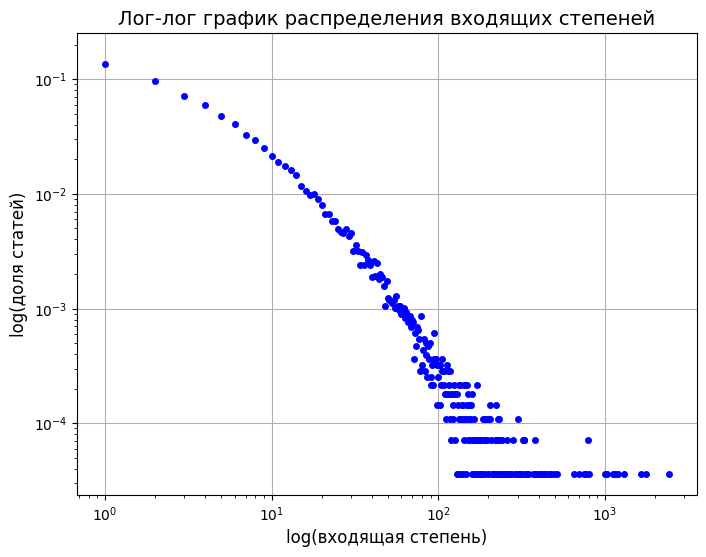

Основание логарифма: 10 (log-log график с масштабом по основанию 10).


In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from google.colab import files

# Загрузка файла пользователем
uploaded = files.upload()

# Проверка загрузки
if not uploaded:
    raise FileNotFoundError("""
    ОШИБКА: Файл не загружен!
    Действия:
    1. Нажмите на кнопку 'Choose File'
    2. Выберите файл alg_phys-cite.txt
    3. Дождитесь завершения загрузки
    """)

file_name = list(uploaded.keys())[0]

# Создание графа: {цитируемая статья: список тех, кто её цитирует}
graph = defaultdict(list)

with io.BytesIO(uploaded[file_name]) as f:
    for line in f:
        decoded_line = line.decode('utf-8').strip()
        if not decoded_line:
            continue
        papers = decoded_line.split()
        citing_paper = papers[0]
        for cited_paper in papers[1:]:
            graph[cited_paper].append(citing_paper)

# Собираем множество всех статей
all_papers = set(graph.keys()) | set(paper for citing in graph.values() for paper in citing)
in_degrees = {paper: 0 for paper in all_papers}

# Подсчет входящих степеней
for cited, citers in graph.items():
    in_degrees[cited] = len(citers)

# Построение распределения: [входящая степень] -> [кол-во статей с такой степенью]
degree_distribution = defaultdict(int)
for deg in in_degrees.values():
    degree_distribution[deg] += 1

# Нормализация
total = sum(degree_distribution.values())
norm_distribution = {k: v / total for k, v in degree_distribution.items()}

# Лог-лог график
x = list(norm_distribution.keys())
y = list(norm_distribution.values())

plt.figure(figsize=(8, 6))
plt.loglog(x, y, 'bo', markersize=4)
plt.xlabel('log(входящая степень)', fontsize=12)
plt.ylabel('log(доля статей)', fontsize=12)
plt.title('Лог-лог график распределения входящих степеней', fontsize=14)
plt.grid(True)
plt.show()

print("Основание логарифма: 10 (log-log график с масштабом по основанию 10).")


#### Подзадача 2

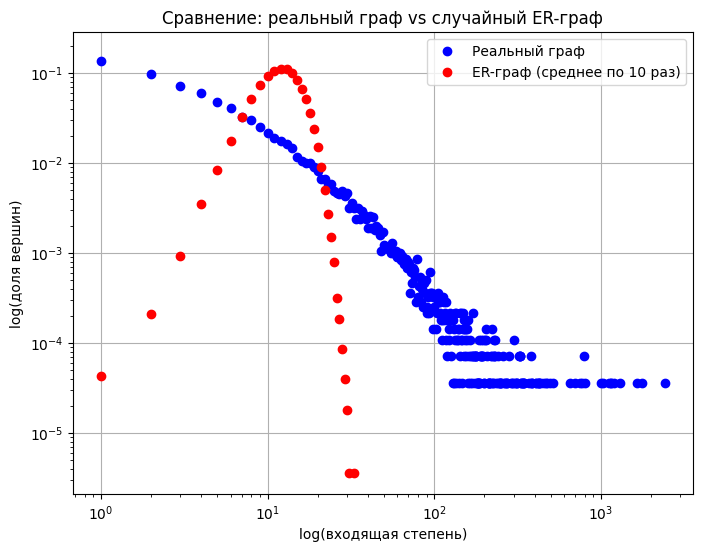

In [ ]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

num_nodes = len(in_degrees)                 # = 27770
num_edges_real = sum(len(citers) for citers in graph.values())  # ≈ 352807
N = 10  # число случайных графов для усреднения

# Быстрая генерация: случайные пары (i, j), i ≠ j
degree_counts = defaultdict(float)

for _ in range(N):
    in_deg = defaultdict(int)

    for _ in range(num_edges_real):
        i = random.randint(0, num_nodes - 1)
        j = random.randint(0, num_nodes - 1)
        while i == j:
            j = random.randint(0, num_nodes - 1)
        in_deg[j] += 1

    for deg in in_deg.values():
        degree_counts[deg] += 1

# Усреднение и нормализация
for k in degree_counts:
    degree_counts[k] /= N

total = sum(degree_counts.values())
norm_dist_er = {k: v / total for k, v in degree_counts.items()}

# Построение графика
x_er = list(norm_dist_er.keys())
y_er = list(norm_dist_er.values())

plt.figure(figsize=(8, 6))
plt.loglog(x, y, 'bo', label='Реальный граф')
plt.loglog(x_er, y_er, 'ro', label='ER-граф (среднее по {} раз)'.format(N))
plt.xlabel('log(входящая степень)')
plt.ylabel('log(доля вершин)')
plt.title('Сравнение: реальный граф vs случайный ER-граф')
plt.legend()
plt.grid(True)
plt.show()


> Синий график (реальный граф цитирований) убывает медленно и тянется далеко вправо — это значит, что есть немного статей с очень высокой входящей степенью. Это типичный признак степенного распределения (power law): чем больше входящая степень, тем реже, но такие статьи есть.

> Красный график (случайный ER-граф) — куполообразный, симметричный, быстро спадает. Это похоже на пуассоновское распределение, где почти все вершины имеют близкое количество входящих связей, и почти нет "сверхпопулярных" узлов.

Распределение входящих степеней в реальном графе значительно отличается от случайного. Реальный граф имеет длинный хвост, что указывает на неравномерность цитирования — немногие статьи получают очень много ссылок. ER-граф же показывает равномерное поведение без выраженных «лидеров», что делает его плохой моделью для цитатных сетей.

#### Подзадача 3

In [ ]:
import math

# Из условия задачи
n = 27770             # Количество статей (узлов)
target_edges = 352807 # Количество рёбер в реальном графе

# Решим уравнение: m * (n - m) = target_edges
# Преобразуем к квадратному: m^2 - n*m + target_edges = 0
a = 1
b = -n
c = target_edges

# Дискриминант
discriminant = b**2 - 4 * a * c

# Два корня, но нам подходит тот, что поменьше
m1 = int((n - math.sqrt(discriminant)) / 2)
m2 = int((n + math.sqrt(discriminant)) / 2)

print("n = 27770")
print(f"m = {m1}")
print(f"Проверка: m * (n - m) = {m1 * (n - m1)} рёбер (приближенно к 352807)")


n = 27770
m = 12
Проверка: m * (n - m) = 333096 рёбер (приближенно к 352807)


#### Подзадача 4

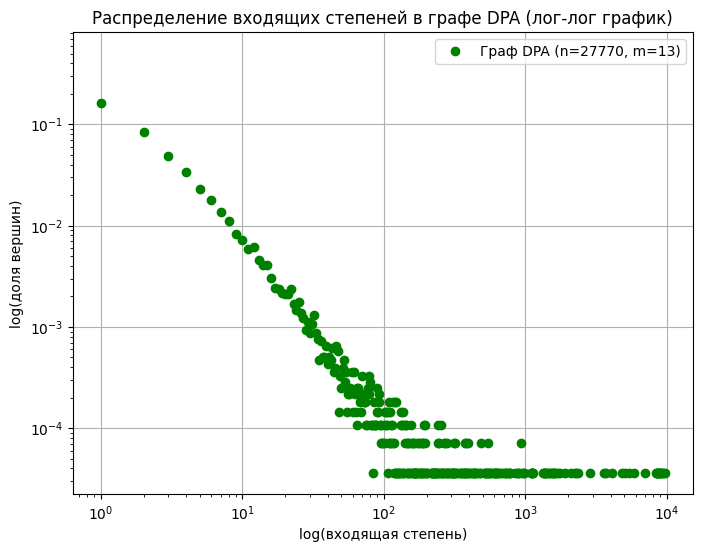

In [ ]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

n = 27770  # число вершин, как в реальном графе
m = 13     # количество рёбер, исходящих из каждой новой вершины

class DPATrial:
    def __init__(self, num_nodes):
        self._num_nodes = num_nodes
        self._node_list = [node for node in range(num_nodes) for _ in range(num_nodes)]

    def run_trial(self, num_nodes_to_attach):
        new_neighbors = set()
        while len(new_neighbors) < num_nodes_to_attach:
            chosen = random.choice(self._node_list)
            new_neighbors.add(chosen)

        self._node_list.extend(new_neighbors)
        self._node_list.extend([self._num_nodes])
        self._num_nodes += 1
        return new_neighbors

# Шаг 1: построение полного графа на m вершинах
dpa_graph = defaultdict(list)
for i in range(m):
    for j in range(m):
        if i != j:
            dpa_graph[i].append(j)

# Шаг 2: генерация графа DPA с использованием DPATrial
dpa_trial = DPATrial(m)

for new_node in range(m, n):
    neighbors = dpa_trial.run_trial(m)
    dpa_graph[new_node] = list(neighbors)

# Шаг 3: Расчёт входящих степеней
in_degrees = defaultdict(int)
for src in dpa_graph:
    for dst in dpa_graph[src]:
        in_degrees[dst] += 1

for node in range(n):
    in_degrees[node] += 0

# Шаг 4: Распределение входящих степеней
degree_dist = defaultdict(int)
for deg in in_degrees.values():
    degree_dist[deg] += 1

# Нормализация
total = sum(degree_dist.values())
norm_dist_dpa = {k: v / total for k, v in degree_dist.items()}

# Шаг 5: Лог-лог график распределения
x_dpa = list(norm_dist_dpa.keys())
y_dpa = list(norm_dist_dpa.values())

plt.figure(figsize=(8, 6))
plt.loglog(x_dpa, y_dpa, 'go', label='Граф DPA (n=27770, m=13)')
plt.xlabel('log(входящая степень)')
plt.ylabel('log(доля вершин)')
plt.title('Распределение входящих степеней в графе DPA (лог-лог график)')
plt.grid(True)
plt.legend()
plt.show()


#### Подзадача 5

1. Сравнение распределений

> Распределения входящих степеней для реального графа и графа, построенного по алгоритму DPA, похожи: оба имеют тяжёлый хвост. Это означает, что есть немного статей с очень большим числом цитирований. В отличие от них, случайный граф по модели Эрдёша–Реньи даёт распределение, близкое к пуассоновскому, и не воспроизводит такую структуру.

2. Какому феномену соответствует DPA

> Алгоритм DPA реализует эффект Матфея: вершины с высокой степенью имеют большую вероятность быть выбраны снова. Это моделирует рост популярности — «популярные становятся ещё популярнее».

3. Что объясняет структуру графа цитирований

> Структура графа цитирований хорошо объясняется эффектом Матфея: статьи, которые уже широко цитируются, с большей вероятностью будут процитированы вновь. Это приводит к неравномерному распределению входящих ссылок и образованию высокоцитируемых работ.

### 3.2 Примеры работы алгоритма

In [ ]:
import random
from collections import defaultdict

class DPATrial:
    def __init__(self, num_nodes):
        self._num_nodes = num_nodes
        self._node_list = [node for node in range(num_nodes) for _ in range(num_nodes)]

    def run_trial(self, num_nodes_to_attach):
        new_neighbors = set()
        while len(new_neighbors) < num_nodes_to_attach:
            chosen = random.choice(self._node_list)
            new_neighbors.add(chosen)
        self._node_list.extend(new_neighbors)
        self._node_list.extend([self._num_nodes])
        self._num_nodes += 1
        return new_neighbors

# Параметры теста
n = 6  # всего вершин
m = 2  # исходящих ребра у каждой новой

# Построение полного графа на m вершинах
graph = defaultdict(list)
for i in range(m):
    for j in range(m):
        if i != j:
            graph[i].append(j)

# Вывод начального графа
print("Шаг 0: полный граф")
for k in graph:
    print(f"{k} -> {graph[k]}")

# Генерация оставшихся вершин
trial = DPATrial(m)
for new_node in range(m, n):
    neighbors = trial.run_trial(m)
    graph[new_node] = list(neighbors)
    print(f"Шаг {new_node - m + 1}: вершина {new_node} -> {graph[new_node]}")

# Финальный граф
print("\nИтоговый граф:")
for k in sorted(graph):
    print(f"{k} -> {graph[k]}")


Шаг 0: полный граф
0 -> [1]
1 -> [0]
Шаг 1: вершина 2 -> [0, 1]
Шаг 2: вершина 3 -> [0, 1]
Шаг 3: вершина 4 -> [0, 1]
Шаг 4: вершина 5 -> [1, 4]

Итоговый граф:
0 -> [1]
1 -> [0]
2 -> [0, 1]
3 -> [0, 1]
4 -> [0, 1]
5 -> [1, 4]


## **Пункты 2.1 - 2.3 выполнил Гойал Аниш**

## **Пункты 3.1 - 3.2 выполнил Бегзадян Максим**